In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Poisson Processes

Today we will have a look at some of the properties of Poisson processes. Let us first define a function that gives us the arrival times up to time $s$ for a Poisson process of rate $\lambda = 1/m$.

In [13]:
def arrivals(s,m):
    # we will save the arrival times here
    T = np.array([np.random.exponential(m)])

    i = 0
    A = T
    while(A < s):
        Int = np.random.exponential(m)
        A = T[i] + Int
        T = np.append(T, A)
        i = i+1
    return(T)

Let us look at the arrival times of a sample first:

In [15]:
# length of interval
s = 20
# mean of the inter-arrival times
m = 2

T = arrivals(s,m)
print(T)

[ 0.5067262   1.4213438   4.31257939  6.37002768  6.86722551  9.26974887
 14.15767517 17.91821606 20.34604512]


Let us now plot this poisson process, $N(t)$. For this we again define a function, that takes as input the vector of arrival times, $T$, and the length, $s$, of the process.

In [16]:
def poisson_plot(T,s):
    # g determines at how many times we evaluate N(t)
    g = s*1000
    # these are the times at which we evaluate N(t)
    x = np.linspace(0,s,g+1)
    # y is used to record the value of the Poisson process at each time in x
    y = np.zeros(g+1)
    for i in range(0,g+1):
        y[i] = len(T[T<=x[i]])
        
    # now we set up our figure
    plt.figure(figsize=(17, 4))  
    # Remove the plot frame lines.
    ax = plt.subplot(111)    
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)    

    # Ensure that the axis ticks only show up on the bottom and left of the plot.    
    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()  
    plt.xticks(np.arange(0, s + 0.1, step=max(1,np.floor(s/20))))
    plt.yticks(np.arange(0, max(len(T),s/m+3), step=max(1,np.floor(s/10))));
    ax.set_ylim(-1,max(len(T),s/m+2))

    #Label axes and put in ticks
    plt.ylabel('Number of arrivals')
    plt.xlabel('Time')

    ax.plot(x,y, color="darkcyan");

[ 2.94780945  7.0404101   9.37445833  9.43486025 10.80619597 11.15625736
 14.79032047 17.37201871 20.90792874]


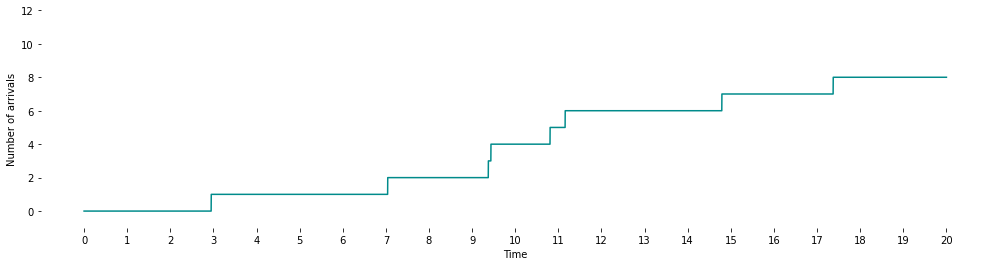

In [17]:
# length of interval
s = 20
# mean of the inter-arrival times
m = 2

T = arrivals(s,m)
print(T)
poisson_plot(T,s)

**Question 1:**

Try different values of $m$ and look at a few samples of this process. Do you notice anything unexpected concerning the plots? Are they more regular than you expected? Or less regular? Does this change as the length of the interval increases?

We know that the expected number of arrivals by time $s$ is $\lambda \cdot s$, which can also be written as $\frac{s}{m}$ if $m$ is the mean inter-arrival time, so the growth is linear in $s$ on average. Is this average linear growth visible on the plot? As you increase $s$, does it become more visible?

## Thinning

We now move on to the next topic: thinning. We know that if we thin the process, by assigning each arrival to a category, we get several independent Poisson processes. We illustrate this here:

First we create a Poisson process with mean $m$, then assign each arrival to the category *blue* or *red*, with probability $1-p$ resp. $p$. This is done by sampling a vector $C$, that has Bernoulli($p$) entries, each arrival corresponding to a 1, will be categorised as *red* and otherwise as *blue*.

In [18]:
# length of interval
s = 20
# mean of the inter-arrival times
m = 2

T = arrivals(s,m)
print(T)
    
p = 0.4
C = np.random.binomial(1,p,len(T))
print(C)

[ 1.01909095  1.03670381  2.62542495  4.40198033  4.76630316  7.46374536
  7.74436979  8.51253743  9.28119916 10.40072566 12.46526632 13.42873032
 14.36675227 18.88461582 18.89238015 19.3847714  20.94239679]
[0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1]


Below we define the blue arrival times to be those entries where the corresponding entry in $C$ is 0, and the red entries are those where the corresponding entry in $C$ is 1. We save these arrivals as $T_b$, respectively $T_r$.

In [19]:
T_b = T[C==0]
T_r = T[C==1]
print("T = " + str(T))
print("C = " + str(C))
print("T_b = " + str(T_b))
print("T_r = " + str(T_r))

T = [ 1.01909095  1.03670381  2.62542495  4.40198033  4.76630316  7.46374536
  7.74436979  8.51253743  9.28119916 10.40072566 12.46526632 13.42873032
 14.36675227 18.88461582 18.89238015 19.3847714  20.94239679]
C = [0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1]
T_b = [ 1.01909095  1.03670381  2.62542495  4.40198033  7.46374536  8.51253743
  9.28119916 12.46526632 14.36675227 18.88461582 19.3847714 ]
T_r = [ 4.76630316  7.74436979 10.40072566 13.42873032 18.89238015 20.94239679]


Now we plot these processes. To do this we define the function *thin_plot* which takes as input a vector $T$ of arrivals, the length $s$ of the process and the probability $p$ with which each entries is assigned the color *red*, all other entries are assigned the color *blue*.

In [20]:
def thin_plot(T,s,p):
    # First we subset the arrivals, just as above
    C = np.random.binomial(1,p,len(T))
    T_b = T[C==0]
    T_r = T[C==1]
    
    # Then we define the Poisson processes corresponding to these arrivals
    g = s*1000
    x = np.linspace(0,s,g+1)

    y = np.zeros(g+1)
    for i in range(0,g+1):
        y[i] = len(T[T<=x[i]])

    y_b = np.zeros(g+1)
    for i in range(0,g+1):
        y_b[i] = len(T_b[T_b<=x[i]])

    y_r = np.zeros(g+1)
    for i in range(0,g+1):
        y_r[i] = len(T_r[T_r<=x[i]])
    
    # now we set up our figure
    plt.figure(figsize=(17, 4))  
    # Remove the plot frame lines.
    ax = plt.subplot(111)    
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)    

    # Ensure that the axis ticks only show up on the bottom and left of the plot.    
    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()  
    plt.xticks(np.arange(0, s + 0.1, step=max(1,np.floor(s/20))))
    plt.yticks(np.arange(0, max(len(T),s/m+3), step=max(1,np.floor(s/10))));
    ax.set_ylim(-1,max(len(T),s/m+2))

    #Label axes and put in ticks
    plt.ylabel('Number of arrivals')
    plt.xlabel('Time')

    plt.plot(x,y, linestyle = "solid", color = 'darkcyan', label="All arrivals (p = " + str(p) +")")
    plt.plot(x,y_b, linestyle = "dashed", color='blue', label = "Blue arrivals (p = " + str(1-p) +")")
    plt.plot(x,y_r, linestyle = "dotted", color='red', label = "Red arrivals");
    plt.legend()
        
    

Let's now use look at a few sample paths of this thinned Poisson process.

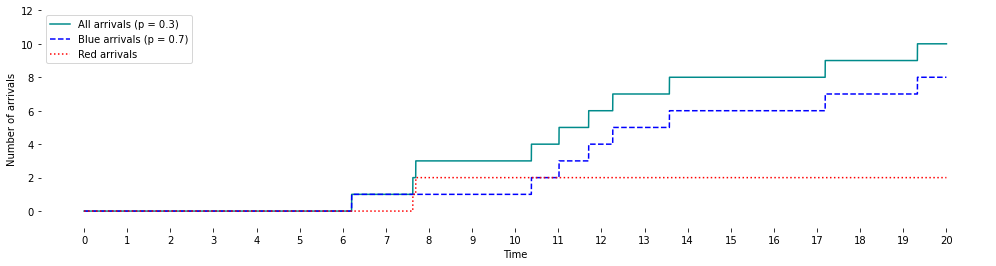

In [21]:
# length of the process
s = 20
# probability of an entry being red
p = 0.3

# sample the Poisson arrivals
T = arrivals(s,m)

thin_plot(T,s,p)

In the graph above it should be visible that the cyan plot is the sum of the red and the blue plot. Feel free to play with the parameters to get a better sense of how different these plots look like and what a typical plot looks like.

## Time since the last arrival

We now move on to a completely different topic: the time since the last arrival. In Problem D 2.52 we derived the distribution and the expected value of the time since the last arrival, i.e. $t-L$, where $L$ is the last arrival before time $t$. We want to look at this distribution now, by taking a few samples of this random variable.

In [22]:
# length of interval
s = 6
# mean of the inter-arrival times
m = 2
# number of samples we take
reps = 1000

L = np.zeros(reps)

for rep in range(0,reps):
    T = arrivals(s,m)
    L[rep] = s - max(np.append(0,T[T<s]))
    rep = rep + 1

Let us now look at the histogram of the time since the last arrival for these *reps* many samples. 

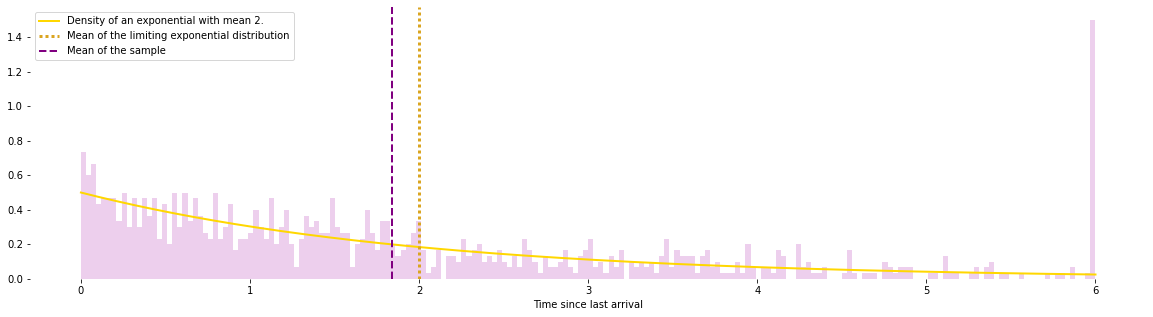

In [23]:
plt.figure(figsize=(20, 5))
# Remove the plot frame lines.
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    

# Ensure that the axis ticks only show up on the bottom and left of the plot.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 

plt.hist(L, bins = 200, density = True, color='plum', alpha = 0.5)
x = np.linspace(0,s,s*1000)
y = np.exp(-x/m)/m
ax.plot(x, y, linestyle = "solid", color = "gold", linewidth=2,  label = "Density of an exponential with mean " + str(m) +".")
plt.axvline(x = 2, color = "goldenrod", linewidth=3, linestyle = (0, (1, 1)), label = "Mean of the limiting exponential distribution")
plt.axvline(x = np.mean(L), color = "purple",linestyle = "dashed", linewidth=2, label = "Mean of the sample")
plt.legend()
plt.xlabel("Time since last arrival");

**Question 2:** 

Recall from Homework 3 that $\mathbb{P}(s - L > t ) = e^{-\lambda t} $ and $\mathbb{P}(s - L = s) = e^{-\lambda s}$. So we can conclude that the distribution of the time since the last arrival approaches the exponential distribution with mean $m$ as $ s \to \infty$. What is the most obvious deviation from this limit for small $s$? Based on the histogram above, how large does $s$ have to be for the histogram to approach the density of an exponential random variable? Feel free to increase the sample size to get a better approximation of the distribution.

**Question 3:** 

Finally, recall the inspection paradox from page 140 in Durrett's book *Essentials of stochastic processes*. It was shown there that the expected lifetime of a component upon inspection is $\frac{\mathbb{E}[t_i^2]}{\mathbb{E}[t_i]}$. Thus the expected lifetime of a component upon inspection, when a Poisson Process has been going on for a long time, is $2m$, where $m$ is the mean inter-arrival time. 

We know from Problem D 2.52 that the expected time since the last arrival is $m$ as $t \to \infty$, which was also illustrated in the histogram above. Now recall the fact that any given time $t$, the waiting time until the next arrival is exponential with mean $m$. Does this give you another way of deriving the result from the inspection paradox for the Poisson process?

## Assignment
Please answer at least one of the questions posed in this notebook in the corresponding discussion post on bcourses. As always I would love to hear your __[feedback](https://docs.google.com/forms/d/e/1FAIpQLSe42BjDteeuBn_V4ABxSeQGid6ZzoEuydFmI7OvO2R1ap9T3g/viewform?usp=sf_link)__.